# Figure 4

Load Libraries

In [23]:
import numpy as np                  # Data  
import pandas as pd                 # Data 
import matplotlib.pyplot as plt     # Plot
import matplotlib as mpl            # Plot  

Use Latex Font

In [24]:
plt.rcParams.update({"text.usetex": True,
                     "font.family": "serif",
                     "font.serif": ["Computer Modern"],
                     "font.size": 11,
                     "axes.labelsize": 11,
                     "legend.fontsize": 11,
                     "xtick.labelsize": 9,
                     "ytick.labelsize": 9})  

## Data & Methods

Read CF data

In [25]:
cf_wind = pd.read_csv('../Data/cf_wind_2014-2023.csv',
                      index_col = 0,
                      parse_dates = True).dropna()

Create function to calculate skill scores comparing the three models to the observations

In [26]:
def calculate_metrics(reference, model):
    cc = np.corrcoef(reference, model)[0, 1]
    rmse = np.sqrt(np.mean((reference - model) ** 2))
    mbe = np.mean(model - reference)
    return np.round(cc, 3), np.round(rmse,3),  np.round(mbe,3)

Apply the function and store the results in a pandas DataFrame

In [27]:
metrics = {}
reference = cf_wind["OBS"]
models = ["ATL", "C3S GRD", "C3S NAT"]

for model in models:
    metrics[model] = calculate_metrics(reference, cf_wind[model])

metrics_df = pd.DataFrame(metrics, index=["CC", "RMSE", "MBE"])

Table 1

In [28]:
metrics_df

,ATL,C3S GRD,C3S NAT
CC,0.982,0.971,0.969
RMSE,0.045,0.178,0.163
MBE,-0.003,0.138,0.122


# Plot

In [29]:
def truncate_colormap(cmap, minval = 0.0, maxval = 1.0, n = 100):
    new_cmap = mpl.colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n = cmap.name, a = minval, b = maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap

In [ ]:
cmap = truncate_colormap(mpl.colormaps['viridis'], maxval = 0.2, minval = 0.95)
cmap = cmap.resampled(6)
bins = np.arange(-0.025, 1.05, 0.05)
centered_bins = 0.5 * (bins[1:] + bins[:-1])

bounds = [10, 50, 100, 500, 1000, 5000]
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

models = {'ATL': cf_wind['ATL'].values,
          'C3S GRD': cf_wind['C3S GRD'].values,
          'C3S NAT': cf_wind['C3S NAT'].values}

cm = 1 / 2.54

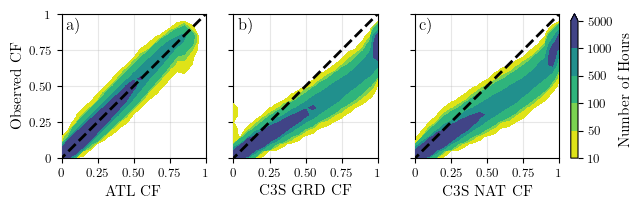

In [ ]:
fig, ax = plt.subplots(1, 3, 
                       figsize=(16*cm, 5*cm),
                       constrained_layout = True)

for i, (label, model_data) in enumerate(models.items()):
    # Create histogram
    hist, _, _ = np.histogram2d(x = model_data, y = cf_wind['OBS'].values,
                                bins = bins,
                                density = False)
    
    # Contour plot
    im = ax[i].contourf(centered_bins, centered_bins,
                        hist.T,
                        levels = bounds,
                        cmap = cmap,
                        norm = norm,
                        extend = 'max',
                        zorder = 3)
    
    # Add diagonal line
    ax[i].plot(bins, bins,
               c = 'k',
               lw = 2,
               ls = '--',
               zorder=5)
    
    # Set axis properties
    ax[i].set_aspect(1.)

    ax[i].set_xlim(0, 1)
    ax[i].set_xticks([0, 0.25, 0.5, 0.75, 1])
    ax[i].set_xticklabels(['0', '0.25', '0.50', '0.75', '1'])
    ax[i].set_xlabel(f'{label} CF')

    ax[i].set_ylim(0, 1)
    ax[i].set_yticks([0, 0.25, 0.5, 0.75, 1])
    ax[i].set_yticklabels(['0', '0.25', '0.50', '0.75', '1'])
    if i != 0:
        ax[i].set_yticklabels([])
    else:
        ax[i].set_ylabel('Observed CF')

    ax[i].grid(True, alpha = 0.3, zorder = 0)

    ax[i].text(0.03, 0.98,
               f'{chr(97 + i)})',
               fontsize = 12,
               ha = 'left', va = 'top',
               transform = ax[i].transAxes)

cbar = fig.colorbar(im, ax = ax[-1])
cbar.set_label('Number of Hours')

# fig.savefig('4_verification_wind_contour.png', bbox_inches = 'tight', dpi = 300)